In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# importar funciones propias
import src.batch as br
import src.cstr as cstr
import src.pfr as pfr

# Apendice (Sesión 03)

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 1.1 Reactores discontinuos

### 1.1.2 Aplicaciones numéricas de la ecuación de diseño

La ecuación de diseño para un reactor batch está dada por:

$$\frac{dN_j}{dt} =  r_j V$$

En la ***Tabla 1*** se ejemplifica la aplicación de la ecuación de diseño para distintos tipos de reacciones en un reactor Batch.

<center>

***Tabla 1. Ecuaciones de diseño reactor batch para distintos tipos de reacciones.***

| Reacción | Prototipo | tasas relativas | Sistema |
|:--:|:--:|:--:|:--:|
| Transformación | $$\mathrm{aA \longrightarrow cC}$$ | $$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$ | $$\begin{matrix} \frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V \end{matrix}$$ |
| Síntesis | $$\mathrm{aA + bB \longrightarrow cC}$$ | $$\frac{r_{\mathrm{A}}}{-\mathrm{a}} = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}}$$ | $$\begin{matrix} \frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V\\ \\ \frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{-\mathrm{a}}\right) r_{\mathrm{A}} V \end{matrix}$$ |
| Descomposición | $$\mathrm{aA \longrightarrow cC + dD}$$ | $$\frac{r_{\mathrm{A}}}{-\mathrm{a}}  = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}}$$ | $$\begin{matrix} \frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{\mathrm{-a}}\right) r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{D}}}{dt} =  \left(\frac{\mathrm{d}}{-\mathrm{a}}\right) r_{\mathrm{A}} V \end{matrix}$$ |
| General | $$\mathrm{aA + bB \longrightarrow cC + dD }$$ | $$\frac{r_{\mathrm{A}}}{-\mathrm{a}}  = \frac{r_{\mathrm{B}}}{-\mathrm{b}} = \frac{r_{\mathrm{C}}}{\mathrm{c}} = \frac{r_{\mathrm{D}}}{\mathrm{d}} $$ | $$\begin{matrix} \frac{dN_{\mathrm{A}}}{dt} =  r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{B}}}{dt} =  \left(\frac{\mathrm{b}}{\mathrm{a}}\right) r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{C}}}{dt} =  \left(\frac{\mathrm{c}}{\mathrm{-a}}\right) r_{\mathrm{A}} V \\ \\ \frac{dN_{\mathrm{D}}}{dt} =  \left(\frac{\mathrm{d}}{-\mathrm{a}}\right) r_{\mathrm{A}} V \end{matrix}$$ |

</center>

La función `batch`, escrita como implementación propia en el archivo `batch.py`, se puede utilizar para obtener la cinética en un reactor batch.

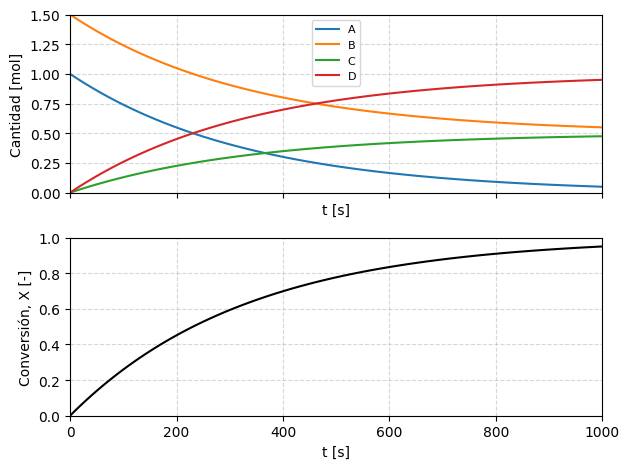

In [3]:
### Reacción (aA + bB -> cC + dD)
orden = 1
k = 3e-3 # constante de reacción
species = [r"A", r"B", r"C", r"D"]
n0 = np.array([1, 1.5, 0, 0]) # cantidades iniciales de [A, B, C, D], [mol]
s = np.array([-1, -1, 0.5, 1]) # coefs estequiométricos [a, b, c, d], [-]
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(br.batch, t_span, y0=n0, args=(s, k, V, orden), events=br.batchEnd, t_eval=t_eval)
t, n = sol.t, sol.y

# cálculo de conversión
nA0, nA = n0[0], n[0]
X = 1 - nA/nA0

# gráfico
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
# cantidad de especies vs tiempo
for i, specie in enumerate(species):
    ax0.plot(t, n[i], label=specie)
ax0.set(xlim=t_span, ylim=(0, np.max(n)), xlabel='t [s]', ylabel='Cantidad [mol]')
ax0.grid(ls="--", alpha=0.5)
ax0.legend(fontsize=8)
# conversión vs tiempo
ax1.plot(t, X, color='black', label=r"$X$")
ax1.set(xlim=t_span, ylim=(0,1), xlabel='t [s]', ylabel='Conversión, X [-]')
ax1.grid(ls="--", alpha=0.5)
fig.tight_layout()
plt.show()

### 1.1.3 Aplicaciones numéricas en términos de la conversión

La ecuación de diseño para un reactor batch, en función de la conversión, es una sola ecuación escrita en términos del reactivo limitante:

$$N_{\mathrm{A}_0} \frac{d X}{dt} = -r_{\mathrm{A}} V$$

La evolución de las especies químicas se calcula a partir de la conversión utilizando relaciones estequiométricas como las que se muestran en la ***Tabla 2***, para una reacción general:

$$\mathrm{aA + bB \longrightarrow cC + dD }$$


<center>

***Tabla 2. Tabla estequiométrica para una reacción general balanceada en un reactor batch.***

| Especie | Inicial | Cambio | Remanente (Balance) |
|:--:|:--:|:--:|:--:|
| $$\mathrm{A}$$ | $$N_{\mathrm{A_0}}$$ | $$-\left(N_{\mathrm{A_0}}X\right)$$ | $$N_{\mathrm{A}} = N_{\mathrm{A_0}} \left(1-X\right)$$ |
| $$\mathrm{B}$$ | $$N_{\mathrm{B_0}}=N_{\mathrm{A_0}}\theta_{\mathrm{B}}$$ | $$-\frac{b}{a}\left(N_{\mathrm{A_0}}X\right)$$ | $$N_{\mathrm{B}} = N_{\mathrm{A_0}} \left(\theta_{\mathrm{B}}-\frac{b}{a}X\right)$$ |
| $$\mathrm{C}$$ | $$N_{\mathrm{C_0}}=N_{\mathrm{A_0}}\theta_{\mathrm{C}}$$ | $$+\frac{c}{a}\left(N_{\mathrm{A_0}}X\right)$$ | $$N_{\mathrm{C}} = N_{\mathrm{A_0}} \left(\theta_{\mathrm{C}}+\frac{c}{a}X\right)$$ |
| $$\mathrm{D}$$ | $$N_{\mathrm{D_0}}=N_{\mathrm{A_0}}\theta_{\mathrm{D}}$$ | $$+\frac{d}{a}\left(N_{\mathrm{A_0}}X\right)$$ | $$N_{\mathrm{C}} = N_{\mathrm{A_0}} \left(\theta_{\mathrm{D}}+\frac{d}{a}X\right)$$ |

</center>

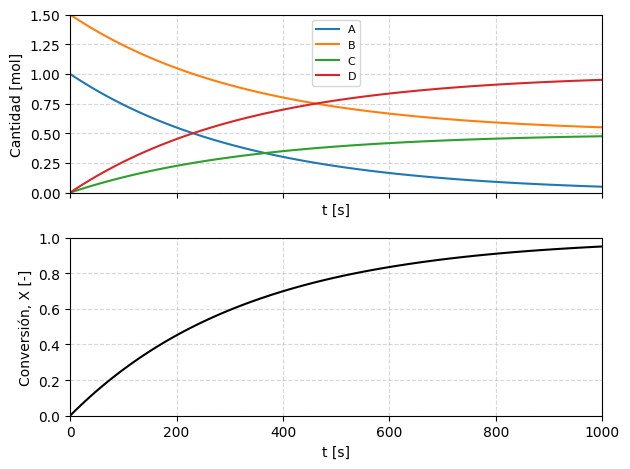

In [4]:
### Reacción (aA + bB -> cC + dD)
orden = 1
k = 3e-3 # constante de reacción
nA0 = 1
V = 1 # tamaño del reactor, [m3]

t_span = (0, 1000) # rango de tiempo para integración, en [u.a.]
dt = 10 # paso de tiempo, en [u.a.]
t_eval = np.arange(t_span[0], t_span[1]+dt, dt) # array con tiempos en los que se evalua la integración, en [u.a.]

# solución del sistema de ecuaciones diferenciales ordinarias, considerando evento para terminación del cálculo.
sol = solve_ivp(br.batchX, t_span, y0=[0], args=(nA0, k, V, orden), events=br.batchXEnd, t_eval=t_eval)
t, X = sol.t, sol.y[0]

# cálculo de cantidad de especies químicas, n
species = [r"A", r"B", r"C", r"D"]
n0 = np.array([nA0, 1.5, 0, 0]) # cantidades iniciales de [A, B, C, D], [mol]
s = np.array([-1, -1, 0.5, 1]) # coefs estequiométricos [a, b, c, d], [-]
tr = n0/n0[0] # cociente theta
sr = s/s[0] # cociente de coef estequiométricos
n = np.empty(shape=(len(species), len(X)))
for i in range(len(n)):
    n[i] = n0[0] * (tr[i] - sr[i]*X)

# gráfico
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
# cantidad de sustancia
for i, specie in enumerate(species):
    ax0.plot(t, n[i], label=specie)
ax0.set(xlim=t_span, ylim=(0, np.max(n)), xlabel='t [s]', ylabel='Cantidad [mol]')
ax0.grid(ls="--", alpha=0.5)
ax0.legend(fontsize=8)
# conversión
ax1.plot(t, X, color='black', label=r"$X$")
ax1.set(xlim=t_span, ylim=(0,1), xlabel='t [s]', ylabel='Conversión, X [-]')
ax1.grid(ls="--", alpha=0.5)
fig.tight_layout()
plt.show()

## 1.2 Reactor Agitado de Flujo Continuo (CSTR)

### 1.2.3 Aplicaciones numéricas en términos de la conversión

La trayectoria de la reacción está dada por la siguiente ecuación algebráica:

$$V = \frac{F_{\mathrm{A}_0} X}{-r_{\mathrm{A}}}$$

o 

$$V = \frac{\dot{Q} C_{\mathrm{A}_0} X}{-r_{\mathrm{A}}}$$

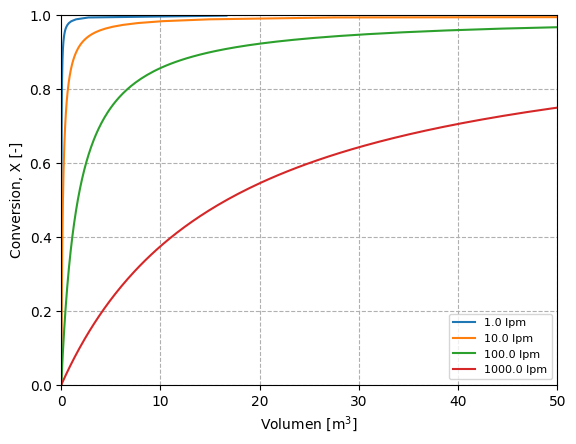

In [20]:
# Estudiando el efecto del flujo volumétrico

### Reacción (aA + bB -> cC + dD)
order = 1
k = 1e-3 # constante de reacción.
Q = 1e-2 # [m3.s-1]
cA0 = 1.0

fig, ax = plt.subplots()
lpms = np.logspace(0, 3, 4)
for lpm in lpms:
    Q = lpm / 60 / 1000
    X = np.linspace(0, .999, 200)
    V = cstr.cstrQVX(X, Q, cA0, k, order=order)
    ax.plot(V, X, label=f"{lpm} lpm")
ax.set(xlim=(0, 50), ylim=(0, 1), xlabel=r'Volumen [m$^3$]', ylabel='Conversion, X [-]')
ax.grid(ls='--')
ax.legend(fontsize=8)
plt.show()

## 1.3 Reactor de flujo pistón (PFR)

### 1.3.3. Aplicaciones numéricas en términos de la conversión

La trayectoria de la reacción está dada por la ecuación diferencial:

$$V = F_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$

o 

$$V = \dot{Q} C_{\mathrm{A}_0} \int_{0}^{X} \frac{dX}{-r_{\mathrm{A}}}$$

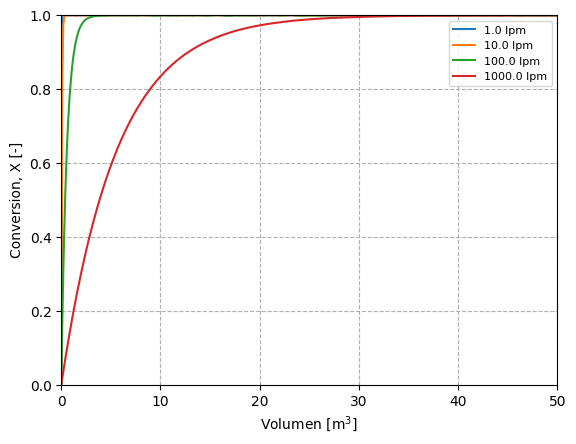

In [19]:
### Reacción (aA + bB -> cC + dD)
orden = 1
k = 3e-3 # constante de reacción
cA0 = 1.0


fig, ax = plt.subplots()
lpms = np.logspace(0, 3, 4)
for lpm in lpms:
    Q = lpm / 60 / 1000
    v_span, dv = (0, 50), 0.1
    v_eval = np.arange(v_span[0], v_span[1]+dv, dv)
    # solución de ecuación diferencial ordinaria
    sol = solve_ivp(pfr.pfrX, v_span, y0=[0], args=(Q, cA0, k, orden), events=pfr.pfrXEnd, t_eval=v_eval)
    V, X = sol.t, sol.y[0]
    ax.plot(V, X, label=f"{lpm} lpm")
ax.set(xlim=(0, 50), ylim=(0, 1), xlabel=r'Volumen [m$^3$]', ylabel='Conversion, X [-]')
ax.grid(ls='--')
ax.legend(fontsize=8)
plt.show()
